In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 41.2 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 11.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=83d41e38fd7b408696539bd9f7d7fdb39535af126d10890ceddfaf5a7fbdcff5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/final_data.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,product_name,rates,review,label,pos,sentiment_score,error
0,0,0,1,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n캄포어베니어 385...,4.3,배송은 빨랐고 조립하는 게 되게 체계적으로 돼있어서 놀랐어요 내부 공간은 넓은데 생...,1,배송 빨랐고 조립 하는 체계 돼있어서 놀랐어요 내부 공간 넓은데 생각 사용 불편해서...,0.052843,4.247157
1,1,1,2,[7%쿠폰]FIHA 서랍장 4.1단 6colors\n화이트 2981.3310,5.0,조립도 너무 쉽게 했고 가격 대비 괜찮은 것 같습니다,1,조립 쉽게 했고 가격 대비 괜찮은 같습니다,0.293895,4.706105
2,2,2,3,[7%쿠폰]FIHA 서랍장 5단 6colors\n화이트 2269.3022,1.8,음 겉보기만 이쁩니다 오늘의 집에서 구입한 것 중 가장 후회해요 이유는 서랍이 잘 ...,0,겉보기 이쁩니다 오늘 구입 가장 후회 해요 이유 서랍 열립니다 닫힙니다 열고 닫을 ...,4.331526,2.531526
3,3,3,4,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n캄포어베니어 385...,5.0,예뻐요 조립이 첨엔 어려울까 싶어서 걱정했는데 하다 보니 할만해요 크고 좋네요 잘...,1,예뻐요 조립 어려울까 싶어서 걱정 했는데 하다 보니 만해 크고 좋네요 쓸게요,0.327761,4.672239
4,4,4,5,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n미들브라운 6098...,4.8,설명서도 잘 되어있고 부속품들도 세심하게 알아보기 쉽게 너무 잘되어 있어서 조립하는...,1,설명 서도 되어있고 부속품 세심 하게 알아보기 쉽게 되어 있어서 조립 하는 쉽고 재...,4.465269,0.334731
...,...,...,...,...,...,...,...,...,...,...
74341,74341,74433,74527,[7%쿠폰]LEITER 선반 4단 2size\n그레이,4.8,한쪽 면이 찌그러져 왔지만 그래도 좋았습니다,1,한쪽 찌그러져 왔지만 좋았습니다,4.829657,0.029657
74342,74342,74434,74528,[7%쿠폰]LEITER 선반 4단 2size\n그레이,4.8,그레이랑 화이트 컬러 샀는데 그레이가 생각보다 톤 다운된 그레이라 너무 이뻐요 화이...,1,그레이 화이트 컬러 샀는데 그레이 생각 다운 그레이 이뻐요 화이트 밝은 벽지 그레이...,1.505016,3.294984
74343,74343,74435,74529,[7%쿠폰]LEITER 선반 4단 2size\n매트실버,4.0,잘 쓰고 있어요 오램만에 어플 키니 리부 남겨라 하네요 ㅋㅋㅋ 좋아요,1,쓰고 있어요 어플 리부 남겨라 하네요 좋아요,1.277234,2.722766
74344,74344,74436,74530,[7%쿠폰]LEITER 선반 4단 2size\n화이트,4.8,올려놓는 선반 부분이 힘이 없다 보니까 가벼운 물건 올려놓으면 지탱하는 게 위태위태...,1,올려놓는 선반 부분 없다 가벼운 물건 올려놓으면 지탱 하는 태위 태해 보이 이쁨,0.277079,4.522921


In [5]:
len(df[df['error'] <= 1])

22880

In [6]:
df['error'].sum() / len(df['error'])

2.209484435998059

In [7]:
df['correction_score'] = df['rates'] * 0.75 + df['sentiment_score'] * 0.25
df['error'] = abs(df['rates'] - df['sentiment_score'])
df['fix_error'] = abs(df['rates'] - df['correction_score'])
df['fix_error'].sum() / len(df['fix_error'])

0.5523711089734149

(0.0, 5.0)

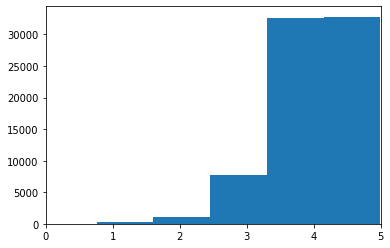

In [8]:
plt.hist(x = df['correction_score'], bins = 5)
plt.xlim([0, 5])

In [9]:
df = df.sort_values(by = 'correction_score', ascending = True)
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,product_name,rates,review,label,pos,sentiment_score,error,correction_score,fix_error
891,891,892,894,[7%쿠폰]OLLSON 책상 4colors\n올화이트 7440.2510,1.0,책상은 참 예쁜데요 마켓 비는 조립 중에 불량 발견하면 절대 환불 안 해줘요 참고하...,0,책상 예쁜데요 마켓 비는 조립 불량 발견 하면 절대 환불 해줘요 참고 하세요 고객 ...,0.036824,0.963176,0.759206,0.240794
66019,66019,66096,66187,[7%쿠폰]OLLSON 책상 4colors\n블랙,1.0,제품에는 문제없고 조립도 잘했지만 씨제이나 우체국 택배로 택배사 좀 바꿔주세요 천일...,0,제품 문제 없고 조립 했지만 씨제이 우체국 택배 택배 바꿔주세요 택배 배송 조회 돼...,0.053931,0.946069,0.763483,0.236517
46282,46282,46329,46398,[7%쿠폰]MKB 캐비넷 가로 2칸 TV스탠드 1180600 7colors\n매트화이트,1.0,최악의 제품을 만나서 화가 잔뜩 났음 남편이 이거 조립하는데 다다다 다이안에 모든 ...,0,최악 제품 만나서 화가 잔뜩 났음 남편 조립 하는데 다다다 이안 모든 져서 왔다고 ...,0.068209,0.931791,0.767052,0.232948
7873,7873,7884,7897,[7%쿠폰]DUBLIN 이동식행거 9001650\n화이트 3525.6614,1.0,부품의 까짐이 앞뒤 양면으로 굉장히 심해서 교환 요청했으나 1214 주문한 이게 ...,0,부품 앞뒤 양면 굉장히 심해서 교환 요청 했으나 주문 오늘 부품 보내 부품 사진 보...,0.070050,0.929950,0.767512,0.232488
4237,4237,4243,4250,[7%쿠폰][빠른배송] SEEOT 스탠드행거 2colors\n화이트 2096.3318,1.0,불친절한 고객센터 역대 최악 부품이 누락되었을 거라고 생각할 정도로 조립이 아예 안...,0,불친절한 고객 센터 역대 최악 부품 누락 되었을 생각 정도 조립 아예 구멍 겁나 작...,0.084919,0.915081,0.771230,0.228770
...,...,...,...,...,...,...,...,...,...,...,...,...
39151,39151,39190,39254,[7%쿠폰]FIHA 서랍장 6단 6colors\n화이트,5.0,예전에도 구매해서 잘 사용하던 제품이라 망설임 없이 구매했습니다 설명서 그림 잘 보...,1,예전 구매 해서 사용 하던 제품 망설임 구매 했습니다 설명 그림 보면 혼자 서도 조...,4.985438,0.014562,4.996360,0.003640
4550,4550,4556,4566,[7%쿠폰]LEITER 선반 4단 2size\n넓은/좁은: 600 넓은 4단 / 컬...,5.0,덕질존 꾸미려고 샀는데 역시 믿고 쓰는 생각보다 너무 커서 놀랐는데 원하는 거 다 ...,1,덕질 꾸미려고 샀는데 역시 믿고 쓰는 생각 커서 놀랐는데 원하는 들어가서 오히려 좋...,4.985749,0.014251,4.996437,0.003563
61770,61770,61839,61917,[7%쿠폰]FIHA 서랍장 0.3단 2colors\n다크그레이,5.0,이사 한 집에 작은 서랍장이 필요하여 구매했어요 특히 색상이 선명하고 너무 좋고요 ...,1,이사 작은 서랍 필요하여 구매 했어요 색상 선명하고 좋고요 조립 하는데 조금 시간 ...,4.986025,0.013975,4.996506,0.003494
10382,10382,10393,10426,[7%쿠폰]POLABO 미니수납장 좁은 2문 SHM4247SL\n미들브라운 0442...,5.0,화장대 정리용 수납장으로 쓰려고 구먜했어요 화장대는 밝은 색인데 비슷한 색이 품절이...,1,화장 정리 수납 쓰려고 했어요 화장 밝은 비슷한 품절 어두운색 샀지만 포인트 되고 ...,4.986793,0.013207,4.996698,0.003302


In [ ]:
thresholds = [int(len(df) * 0.1), int(len(df) * 0.2), int(len(df) * 0.5), int(len(df) * 0.2)]
df_verybad = df.iloc[:thresholds[0], :]
df_bad = df.iloc[thresholds[0]:thresholds[1], :]
df_normal = df.iloc[thresholds[1]:thresholds[2], :]
df_good = df.iloc[thresholds[2]:, :] 

len(df_verybad), len(df_bad), len(df_normal), len(df_good)

(7434, 7435, 22304, 37173)

In [10]:
df_verybad = df[df['correction_score'] <= 2]
df_bad = df[(df['correction_score'] > 2) & (df['correction_score'] <= 3)]
df_normal = df[(df['correction_score'] > 3) & (df['correction_score'] <= 4)]
df_good = df[(df['correction_score'] > 4) & (df['correction_score'] <= 5)]

len(df_verybad), len(df_bad), len(df_normal), len(df_good)

(491, 3907, 30176, 39772)

In [11]:
df_verybad['correction_score'].mean(),  df_bad['correction_score'].mean(), df_normal['correction_score'].mean(), df_good['correction_score'].mean()

(1.5043208199684317, 2.6781873577609443, 3.6407642387803554, 4.487052366470152)

In [18]:
from gensim import corpora
import gensim

def gensim_corpora(data_df, num_topics, passes, num_words):
    tokenized_doc = data_df['pos'].apply(lambda x : x.split())
    dictionary = corpora.Dictionary(tokenized_doc)
    corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics,
                                              id2word = dictionary, passes = passes)
    topics = ldamodel.print_topics(num_words = num_words)


    for topic in topics:
        print(topic)

    return (ldamodel, corpus, dictionary)

ldamodel, corpus, dictionary = gensim_corpora(df_good, 2, 4, 8)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

(0, '0.056*"조립" + 0.012*"서랍" + 0.011*"혼자" + 0.010*"하는" + 0.010*"있어요" + 0.009*"제품" + 0.009*"조금" + 0.008*"설명"')
(1, '0.042*"좋아요" + 0.031*"조립" + 0.026*"튼튼하고" + 0.021*"생각" + 0.018*"배송" + 0.015*"들어요" + 0.013*"가격" + 0.012*"디자인"')


In [19]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [ ]:
for i, topic_list in enumerate(ldamodel[corpus]):
    print(i, '번째 문서의 topic 비율은', topic_list)

In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3.0,0.2356,"[(0, 0.20546429), (1, 0.18004347), (2, 0.22656..."
1,1,4.0,0.4835,"[(0, 0.022250285), (1, 0.022394987), (2, 0.022..."
2,2,0.0,0.4763,"[(0, 0.4762806), (1, 0.19433817), (3, 0.315402..."
3,3,4.0,0.6854,"[(0, 0.015555196), (1, 0.015797872), (2, 0.267..."
4,4,4.0,0.3777,"[(0, 0.1640655), (1, 0.093443364), (2, 0.12895..."
5,5,0.0,0.4963,"[(0, 0.49625412), (1, 0.14801863), (2, 0.06226..."
6,6,4.0,0.4833,"[(0, 0.011262797), (1, 0.48286882), (2, 0.0113..."
7,7,1.0,0.7218,"[(0, 0.028578011), (1, 0.72179663), (2, 0.0300..."
8,8,1.0,0.7126,"[(0, 0.016770165), (1, 0.7125563), (2, 0.01666..."
9,9,1.0,0.3954,"[(0, 0.022615327), (1, 0.39536405), (2, 0.0228..."
